Introduction

Generelle Einführung:
In der Welt des modernen Profisports, werden immer mehr Entscheidungen auf Basis von statistischen Kennzahlen getroffen. Diese Entscheidungen betreffen unterschiedliche Aspekte der jeweiligen Sportarten. Sie können die Sichtung und Beurteilung von Spielern betreffen, die generelle Ausrichtung der Taktik oder die Vermarktung von Vereinen oder Spielern. Es gibt wenige Sportarten, in denen die statistischen Kennzahlen eine so große Rolle spielen wie in der NBA, die in diesem Projekt behandelt wird. 

In diesem Projekt werden Spielerstatistiken der Saison 2023/24, von der Seite https://www.nbastuffer.com/2023-2024-nba-player-stats/ genutzt. Die Daten, die in diesem Projekt genutzt werden, sind in der folgenden Liste aufgeführt. 

Liste der Datenfelder des Datensatzes:
1. RANK: Die Rangnummer des Spielers, meist basierend auf einer bestimmten Statistik oder einem allgemeinen Leistungswert.
    - Integer
    - ID
    - Ordinal
3. NAME: Der Name des Spielers.
    - String
    - ID
    - Nominal
5. TEAM: Das Team, für das der Spieler spielt.
    - String
    - ID
    - Nominal
7. POS: Die Position des Spielers, z. B. Point Guard (PG), Shooting Guard (SG), Small Forward (SF), Power Forward (PF), oder Center (C).
    - String
    - ID
    - Nominal
9. AGE: Das Alter des Spielers in Jahren.
    - Float
    - predictor Variable
    - Numeric
11. GP: Games Played – die Anzahl der Spiele, die der Spieler in der Saison gespielt hat.
    - Integer
    - predictor Variable
    - Numeric
13. MPG: Minutes Per Game – die durchschnittliche Spielzeit des Spielers pro Spiel.
    - Float
    - predictor Variable
    - Numeric
14. USG%: Usage Percentage – der Anteil der Teampossessionen, bei denen der Spieler einen Abschluss (Wurf, Freiwurf oder Turnover) hatte, während er auf dem Feld war.
    - Float
    - predictor Variable
    - Numeric
15. TO%: Turnover Percentage – der Prozentsatz der Possessionen, bei denen der Spieler einen Turnover begeht.
    - Float
    - predictor Variable
    - Numeric
17. FTA: Free Throw Attempts – die Anzahl der Freiwurfversuche des Spielers.
    - Integer
    - predictor Variable
    - Numeric
19. FT%: Free Throw Percentage – die Trefferquote des Spielers bei Freiwürfen.
    - Float
    - predictor Variable
    - Numeric
21. 2PA: Two-Point Attempts – die Anzahl der Würfe des Spielers aus dem Zweipunktbereich.
    - Integer
    - predictor Variable
    - Numeric
23. 2P%: Two-Point Percentage – die Trefferquote des Spielers bei Zweipunktwürfen.
    - Float
    - predictor Variable
    - Numeric
25. 3PA: Three-Point Attempts – die Anzahl der Dreipunktwürfe des Spielers.
    - Integer
    - predictor Variable
    - Numeric
27. 3P%: Three-Point Percentage – die Trefferquote des Spielers bei Dreipunktwürfen.
    - Float
    - predictor Variable
    - Numeric
29. eFG%: Effective Field Goal Percentage – eine angepasste Wurfquote, die den Wert von Dreipunktwürfen berücksichtigt.
    - Float
    - predictor Variable
    - Numeric
31. TS%: True Shooting Percentage – eine erweiterte Wurfquote, die alle Wurfformen (Zweipunkte-, Dreipunktwürfe und Freiwürfe) einbezieht.
    - Float
    - predictor Variable
    - Numeric
33. PPG: Points Per Game – die durchschnittliche Anzahl an Punkten, die der Spieler pro Spiel erzielt.
    - Float
    - predictor Variable
    - Numeric
35. RPG: Rebounds Per Game – die durchschnittliche Anzahl an Rebounds, die der Spieler pro Spiel sammelt.
    - Float
    - predictor Variable
    - Numeric
37. APG: Assists Per Game – die durchschnittliche Anzahl an Assists, die der Spieler pro Spiel gibt.
    - Float
    - predictor Variable
    - Numeric
39. SPG: Steals Per Game – die durchschnittliche Anzahl an Steals des Spielers pro Spiel.
    - Float
    - predictor Variable
    - Numeric
41. BPG: Blocks Per Game – die durchschnittliche Anzahl an Blocks des Spielers pro Spiel.
    - Float
    - predictor Variable
    - Numeric
43. TPG: Turnovers Per Game – die durchschnittliche Anzahl an Ballverlusten pro Spiel.
    - Float
    - predictor Variable
    - Numeric
45. P+R: Points Plus Rebounds – die Summe aus Punkten und Rebounds des Spielers.
    - Float
    - predictor Variable
    - Numeric
47. P+A: Points Plus Assists – die Summe aus Punkten und Assists des Spielers.
    - Float
    - predictor Variable
    - Numeric
49. P+R+A: Points Plus Rebounds Plus Assists – die Summe aus Punkten, Rebounds und Assists des Spielers.
    - Float
    - predictor Variable
    - Numeric
51. VI: Versatility Index – ein zusammengefasster Leistungswert, der die Fähigkeit eines Spieler wiedergibt Punkte, Vorlagen oder Rebounds zu erziehlen.
    - Float
    - response Variable
    - Numeric
53. ORtg: Offensive Rating – die Punkte, die ein Spieler pro 100 eigenen Possessionen erzielt.
    - Float
    - response Variable
    - Numeric
55. DRtg: Defensive Rating – die Punkte, die ein Spieler pro 100 gegnerischen Possessionen zulässt.
    - Float
    - response Variable
    - Numeric

Bei diesen Daten sind Metriken aufgeführt, die in unterschiedliche Kategorien aufgeteilt werden können. Es gibt die beschreibenden Metriken eines Spielers. Diese enthalten beispielsweise den Namen, das Alter oder das Team, in dem der Spieler in der betrachteten Saison gespielt hat. Eine weitere Kategorie sind die traditionellen Metriken diese enthalten GP, PPG, APG, FTA, 2PA usw. diese Metriken sind Daten, die ermittelt werden anhand von Aktionen während eines Spiels, die von der NBA aufgezeichnet und bereitgestellt werden. Die dritte Kategorie sind fortgeschrittene Statistiken wie beispielsweise die Metriken ORtg, DRtg und VI, für die spezifische Berechnungsformelen genutzt werden, um generelle Statistiken zu erstellen. Die genutzt werden können, um das Offensive Potenzial (ORtg) bzw. das Defensive Potenzial (DRtg) eines Spielers abzubilden.

Der Fokus dies Projektes ist es herauszufinden welche Metriken, den größten Einfluss auf die fortgeschrittenen Leistungsmetriken (VI, ORtg und DRtg) haben. Um zu identifizieren welche Metriken bereits mit den fortgeschrittenen Leistungsmetriken, in diesem Datensatz abgedeckt werden und welchen noch anhand weiterer Metriken abgedeckt werden sollten.

Forschungsfrage: Welche traditionellen Leistungsmetriken haben die stärkste Korrelation zu den fortgeschrittenen Leistungsmetriken in der NBA.

Daten Erfassung:

Die Seite "nbastuffer" gibt mehrere Stellen als Datenquellen an, siehe folgende Seite https://www.nbastuffer.com/insights/sources/. Ein Großteil der betrachteten Daten in diesem Projekt sind von den offiziellen Statistiken der NBA (https://www.nba.com/). Die Daten bestehen aus unterschiedliche Erfassung Kategorien. Zum ersten gibt es die generellen Informationen der Spieler diese werden von jedem Spieler separat gesammelt, hierunter fallen Werte wie Name, Team, Pos, Age. Die zweite Kategorie sind die Spielstatistiken, die während eines Spiels gesammelt werden, hierunter fallen Werte wie GP, MPG, USG%, FTA, 2PA, 3PA, PPG, RPG, APG, SPG, BPG und TPG. Diese Werte werden in der NBA mithilfe von Second Spectrum erfasst. Diese Firma hat sich auf optische Tracker spezialisiert, die genutzt werden, um die Aktionen von Spieler zu erfassen und sammeln¹. Die dritte Kategorie sind die berechneten Werte. Diese Werte werden anhand der gesammelten Werte berechnet, hierunter fallen Werte wie TO%, FT%, 2P%, eFG%, TS%, P+R, P+A, P+R+A, VI, ORtg und DRtg.


In [3]:
# Setup
# Wird benötigt um die csv. Daten in einem Datenobjekt zu Speichern
import pandas as pd
# Wird benötigt, um berechnungen Durchzuführen
import numpy as np
# Wird benötigt, um den Datensatz in Tainingsdaten aufzusplitten
from sklearn.model_selection import train_test_split
# Visualisierungen
import matplotlib.pyplot as plt
# Visualisierungen
import seaborn as sns
# Lineares Regressions Modell
from sklearn.linear_model import LinearRegression
# Lineares Regressions Modell Lasso
from sklearn.linear_model import Lasso
# Bewerttungsmetriken
from sklearn.metrics import mean_squared_error, r2_score
# Skalierung von Datensätzen
from sklearn.preprocessing import StandardScaler
# Alle Combinationen einer Liste finden
import itertools

Data
1. Import der Daten

Dieser Schritt ist bei den Daten in diesem Projekt sehr simpel, die Daten sind in einer .csv Datei im Ordner Daten vorhanden und können mit der Hilfe von Pandas read_csv in einen Dataframe geladen werden.

In [5]:
df = pd.read_csv("../Daten/NBA_Stats_202324.csv", sep = ",")
df.head()

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,NaN,Joel Embiid,Phi,C,30.1,39,33.6,39.6,15.0,452,...,5.6,1.2,1.7,3.8,45.7,40.3,51.3,15.3,124.0,104.8
1,NaN,Luka Doncic,Dal,G,25.1,70,37.5,36.0,14.6,608,...,9.8,1.4,0.5,4.0,43.1,43.7,52.9,15.5,121.9,109.9
2,NaN,Giannis Antetokounmpo,Mil,F,29.4,73,35.2,33.0,15.4,782,...,6.5,1.2,1.1,3.4,42.0,37.0,48.5,14.9,125.6,106.9
3,NaN,Shai Gilgeous-Alexander,Okc,G,25.8,75,34.0,32.9,9.8,649,...,6.2,2.0,0.9,2.2,35.6,36.3,41.8,11.9,128.6,107.7
4,NaN,Jalen Brunson,Nyk,G,27.6,77,35.4,32.5,10.1,497,...,6.7,0.9,0.2,2.4,32.3,35.5,39.1,10.0,124.2,112.6


2. Data structure

a). df.info()
In diesem Bereich werden die generellen Datenstrukturen der Importierten Datei aufgeführt und analysiert. 
Ein großer Teil der Datenfelder, des Datensatzes sind nummerische Werte, nur drei Datenfelder besitzen nicht nummerische Werte. Dies sind die Datenfelder NAME, TEAM und POS in diesen Datenfelder stehen String Werte die Informationen zu Spezifischen Spielern liefer z.B. den Namen des Spielers, das Team des Spielers und die Position des Spielers. Bei den nummerischen Werten gibt es float und integer Werte, wobei die Integer Werte eine deutlich geringere Anzahl besitzen mit 4 Datenfeldern. Die Daten Felder mit Integer sind GP (Games Played), FTA (Free Throw Attempts), 2PA (2 Point Attempts) und 3PA (3 Point Attempts). Die restlichen Datenfelder beinhalten float (Dezimalzahlen) Werte.

b). df.describe()
Alle Datenfelder beinhalten 0 Werte, diese sollten bei der Vorbereitung der Daten, zur Verwendung in der Analyse und in Modellen betrachtet werden. Zusätzlich hat das Datenfeld RANK nur NAN Values. Das bedeutet, dass Datenfeld entfernt werden muss und eine neue ID für die unterschiedlichen Datensätze eingeführt werden sollte, anhand der man den Datensatz identifizieren kann. Es gibt auch noch auffällige Maximalwerte die bei der Analyse der nummerischen Datenfelder aufgefallen sind:

1. FTA
    a. Maximalwert = 782
    b. Mean = 81.321157
    c. std. = 112.790568
3. 2PA
    a. Maximalwert = 1246
    b. Mean = 201.438356
    c. std. = 246.585122
5. 3PA
    a. Maximalwert = 876
    b. Mean = 131.435312
    c. std. = 156.920797
7. P+R+A
    a. Maximalwert = 52.9
    b. Mean = 13.378539
    c. std. = 9.931195

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RANK    0 non-null      float64
 1   NAME    657 non-null    object 
 2   TEAM    657 non-null    object 
 3   POS     657 non-null    object 
 4   AGE     657 non-null    float64
 5   GP      657 non-null    int64  
 6   MPG     657 non-null    float64
 7   USG%    657 non-null    float64
 8   TO%     657 non-null    float64
 9   FTA     657 non-null    int64  
 10  FT%     657 non-null    float64
 11  2PA     657 non-null    int64  
 12  2P%     657 non-null    float64
 13  3PA     657 non-null    int64  
 14  3P%     657 non-null    float64
 15  eFG%    657 non-null    float64
 16  TS%     657 non-null    float64
 17  PPG     657 non-null    float64
 18  RPG     657 non-null    float64
 19  APG     657 non-null    float64
 20  SPG     657 non-null    float64
 21  BPG     657 non-null    float64
 22  TP

array([[<Axes: title={'center': 'RANK'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'GP'}>,
        <Axes: title={'center': 'MPG'}>,
        <Axes: title={'center': 'USG%'}>],
       [<Axes: title={'center': 'TO%'}>, <Axes: title={'center': 'FTA'}>,
        <Axes: title={'center': 'FT%'}>, <Axes: title={'center': '2PA'}>,
        <Axes: title={'center': '2P%'}>],
       [<Axes: title={'center': '3PA'}>, <Axes: title={'center': '3P%'}>,
        <Axes: title={'center': 'eFG%'}>,
        <Axes: title={'center': 'TS%'}>, <Axes: title={'center': 'PPG'}>],
       [<Axes: title={'center': 'RPG'}>, <Axes: title={'center': 'APG'}>,
        <Axes: title={'center': 'SPG'}>, <Axes: title={'center': 'BPG'}>,
        <Axes: title={'center': 'TPG'}>],
       [<Axes: title={'center': 'P+R'}>, <Axes: title={'center': 'P+A'}>,
        <Axes: title={'center': 'P+R+A'}>,
        <Axes: title={'center': 'VI'}>, <Axes: title={'center': 'ORtg'}>],
       [<Axes: title={'center': 'DRtg'

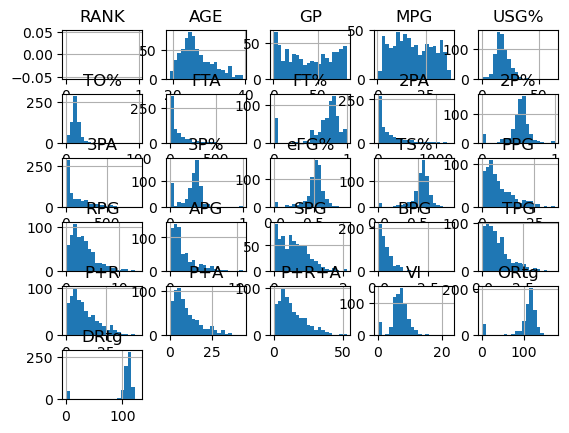

In [8]:
hist = df.hist(bins=20)
hist

In [9]:
df.describe(include=[object])  

,NAME,TEAM,POS
count,657,657,657
unique,573,30,7
top,Shake Milton,Mem,G
freq,3,33,265


In [10]:
pd.set_option('display.max_columns', None)
df_stats = df.describe(include=[np.number])
df_stats

,RANK,AGE,GP,MPG,USG%,TO%,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
count,0.0,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000
mean,NaN,26.699087,40.184170,18.321918,17.956925,12.937747,81.321157,0.682224,201.438356,0.509798,131.435312,0.296423,0.508896,0.537212,8.148858,3.277778,1.952816,0.588128,0.388432,0.955556,11.425723,10.100152,13.378539,6.924049,103.984170,102.061948
std,NaN,4.326873,25.899981,9.976985,6.267817,7.211458,112.790568,0.262107,246.585122,0.156946,156.920797,0.156781,0.130997,0.129117,6.679195,2.391052,1.846791,0.405352,0.408171,0.783093,8.479453,8.201648,9.931195,2.714482,33.339375,29.455077
min,NaN,19.300000,1.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,23.600000,16.000000,10.200000,13.700000,9.500000,8.000000,0.643000,23.000000,0.474000,9.000000,0.250000,0.482000,0.511000,3.300000,1.500000,0.700000,0.300000,0.100000,0.400000,5.000000,4.000000,5.900000,5.600000,103.600000,106.100000
50%,NaN,25.800000,39.000000,17.200000,17.000000,12.400000,36.000000,0.759000,105.000000,0.530000,64.000000,0.336000,0.529000,0.564000,6.100000,2.800000,1.300000,0.500000,0.300000,0.700000,9.300000,7.700000,10.800000,7.000000,113.200000,110.100000
75%,NaN,29.400000,65.000000,26.900000,21.400000,15.500000,106.000000,0.833000,279.000000,0.582000,210.000000,0.384000,0.576000,0.603000,11.500000,4.400000,2.600000,0.900000,0.500000,1.300000,16.400000,14.100000,19.100000,8.400000,120.000000,113.500000
max,NaN,39.300000,82.000000,37.800000,64.000000,100.000000,782.000000,1.000000,1246.000000,1.000000,876.000000,1.000000,0.917000,0.917000,34.700000,13.700000,10.900000,2.100000,3.600000,4.400000,45.700000,43.700000,52.900000,22.900000,172.300000,128.900000


Um potenzielle Ausreißer, für die Dateien zu finden, wurden zwei unterschiedliche Methodiken implementiert. Damit potenzielle Ausreißer in den Daten identifiziert werden können.

1. IQR
    Untergrenze = Q1 - 1.5 * IQR
    Obergrenze = Q3 + 1.5 * IQR 
2. 3*std
    Untergrenze = mean - 3 * std
    Obergrenze = mean + 3 * std

Bewertung der gefundenen Werte: Die 0 Werte für die response Werte (VI, ORtg, DRtg) müssen bereinigt werden, in dem die Datensätze mit 0 Werten entfernt werden. Da diese 0 Werte die Ergebnisse verfälschen können. Bei anderen Werten beispielsweise USG% ist auffällig, dass es einen Wert gibt, der nicht realistisch scheint. Es gibt mehrere potenzielle Ausreißer, die Werte zwischen 33% und 40% haben. Diese Werte sind jedoch realistische Werte für wichtige Spieler eines Teams. Es gibt jedoch einen Spieler der ein USG% von 64% hat. Dieser Spieler hat jedoch nur ein einziges Spiel bestritten, für etwas über 3 Minuten. Deshalb wird eine Minimalgrenze von 10 Spielen eingeführt, die ein Spieler bestritten haben muss, um solche Ausreißer zu vermeiden.
Die restlichen Ausreiser Werte sind entweder keine Ausreißer, sondern die besten Spieler der NBA oder wird durch das Filtern auf einer Mindestanzahl an spielen nicht mehr beachtet.

In [12]:
# Outlier Berechnung mit IQR
outliers = {}
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    print(f"Column: {col}")
    print(f"Q1: {Q1:.2f}, fQ3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Outliers ({len(outliers)}):")
    print(outliers[col])
    print("-" * 40)

Column: RANK
Q1: nan, fQ3: nan, IQR: nan
Lower Bound: nan, Upper Bound: nan
Outliers (1):
Series([], Name: RANK, dtype: float64)
----------------------------------------
Column: AGE
Q1: 23.60, fQ3: 29.40, IQR: 5.80
Lower Bound: 14.90, Upper Bound: 38.10
Outliers (2):
14     39.3
215    38.9
242    38.1
256    38.1
410    38.8
556    38.9
578    38.9
615    38.8
Name: AGE, dtype: float64
----------------------------------------
Column: GP
Q1: 16.00, fQ3: 65.00, IQR: 49.00
Lower Bound: -57.50, Upper Bound: 138.50
Outliers (3):
Series([], Name: GP, dtype: int64)
----------------------------------------
Column: MPG
Q1: 10.20, fQ3: 26.90, IQR: 16.70
Lower Bound: -14.85, Upper Bound: 51.95
Outliers (4):
Series([], Name: MPG, dtype: float64)
----------------------------------------
Column: USG%
Q1: 13.70, fQ3: 21.40, IQR: 7.70
Lower Bound: 2.15, Upper Bound: 32.95
Outliers (5):
0      39.6
1      36.0
2      33.0
22     34.3
352    33.4
447    33.4
456    64.0
558    39.1
619    39.2
643     

In [13]:
# Outlier Berechnung mit std
std_outliers = {}
for col in df.select_dtypes(include=[np.number]).columns:
    mean = df[col].mean()
    std = df[col].std()
    lower_bound = mean - 3 * std 
    upper_bound = mean + 3 * std

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    std_outliers[col] = outliers

    print(f"Column: {col}")
    print(f"Mean: {mean:.2f}, Std Dev: {std:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Outliers ({len(outliers)}):")
    print(outliers.tolist())
    print("-" * 40)

Column: RANK
Mean: nan, Std Dev: nan
Lower Bound: nan, Upper Bound: nan
Outliers (0):
[]
----------------------------------------
Column: AGE
Mean: 26.70, Std Dev: 4.33
Lower Bound: 13.72, Upper Bound: 39.68
Outliers (0):
[]
----------------------------------------
Column: GP
Mean: 40.18, Std Dev: 25.90
Lower Bound: -37.52, Upper Bound: 117.88
Outliers (0):
[]
----------------------------------------
Column: MPG
Mean: 18.32, Std Dev: 9.98
Lower Bound: -11.61, Upper Bound: 48.25
Outliers (0):
[]
----------------------------------------
Column: USG%
Mean: 17.96, Std Dev: 6.27
Lower Bound: -0.85, Upper Bound: 36.76
Outliers (4):
[39.6, 64.0, 39.1, 39.2]
----------------------------------------
Column: TO%
Mean: 12.94, Std Dev: 7.21
Lower Bound: -8.70, Upper Bound: 34.57
Outliers (6):
[40.3, 40.3, 57.1, 100.0, 50.0, 50.0]
----------------------------------------
Column: FTA
Mean: 81.32, Std Dev: 112.79
Lower Bound: -257.05, Upper Bound: 419.69
Outliers (17):
[452, 608, 782, 649, 497, 423, 

In [14]:
# Zwei der auffälligen Datensätze bei der Ausreißer analyse
print(df.iloc[456:457], df.iloc[2:3])

     RANK                NAME TEAM POS   AGE  GP  MPG  USG%  TO%  FTA  FT%  \
456   NaN  Izaiah Brockington  Nor   G  24.8   1  3.4  64.0  0.0    0  0.0   

     2PA  2P%  3PA  3P%  eFG%  TS%  PPG  RPG  APG  SPG  BPG  TPG  P+R  P+A  \
456    4  0.5    1  0.0   0.4  0.4  4.0  2.0  0.0  0.0  0.0  0.0  6.0  4.0   

     P+R+A   VI  ORtg  DRtg  
456    6.0  0.0   0.0   0.0      RANK                   NAME TEAM POS   AGE  GP   MPG  USG%   TO%  FTA  \
2   NaN  Giannis Antetokounmpo  Mil   F  29.4  73  35.2  33.0  15.4  782   

     FT%   2PA    2P%  3PA    3P%   eFG%    TS%   PPG   RPG  APG  SPG  BPG  \
2  0.657  1246  0.644  124  0.274  0.623  0.648  30.4  11.5  6.5  1.2  1.1   

   TPG   P+R   P+A  P+R+A    VI   ORtg   DRtg  
2  3.4  42.0  37.0   48.5  14.9  125.6  106.9  


In [15]:
# 3. Data corrections
df_mingames = df[df["GP"] > 10].copy()
df_mingames = df_mingames[df_mingames.VI != 0.0]
df_mingames = df_mingames[df_mingames.ORtg != 0.0]
df_mingames = df_mingames[df_mingames.DRtg != 0.0]
df_mingames = df_mingames.drop(["RANK"], axis=1)
df_mingames['id'] = range(1, len(df_mingames) + 1)
df_mingames.sort_values(by=['ORtg'])

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg,id
581,Jalen Hood-Schifino,Lal,G,20.8,21,5.2,24.8,16.6,20,0.600,30,0.267,15,0.133,0.244,0.316,1.6,0.6,0.4,0.1,0.1,0.4,2.2,2.0,2.6,5.6,66.3,106.9,506
538,Mouhamadou Gueye,Tor,F,25.8,11,10.9,19.2,23.9,9,0.444,35,0.314,3,0.000,0.289,0.310,2.4,2.1,0.5,0.3,1.6,1.1,4.5,2.8,4.9,5.0,67.2,110.1,485
537,AJ Griffin,Atl,F,20.6,20,8.5,17.3,11.4,2,1.000,23,0.348,39,0.256,0.371,0.382,2.4,0.9,0.3,0.1,0.1,0.4,3.3,2.7,3.6,4.1,77.0,121.7,484
521,Emoni Bates,Cle,F,20.2,15,8.9,19.5,14.0,4,0.250,16,0.313,33,0.303,0.408,0.404,2.7,0.9,0.7,0.1,0.1,0.5,3.7,3.4,4.3,5.4,79.9,115.2,473
600,TyTy Washington Jr.,Mil,G,22.4,11,5.1,17.0,9.1,0,0.000,14,0.286,6,0.333,0.350,0.350,1.3,0.5,0.5,0.3,0.0,0.2,1.7,1.7,2.2,5.4,80.6,117.4,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Daniel Gafford,Dal,F-C,25.5,29,21.5,16.4,13.1,56,0.607,186,0.780,0,0.000,0.780,0.769,11.2,6.9,1.6,0.7,1.9,1.0,18.1,12.8,19.7,9.3,144.1,102.2,167
507,Davis Bertans,Okc,F,31.4,15,6.1,16.0,3.6,15,0.933,2,0.000,24,0.417,0.577,0.675,2.9,0.7,0.6,0.2,0.2,0.1,3.6,3.5,4.2,7.0,146.2,106.5,463
488,Dwight Powell,Dal,F-C,32.7,63,13.3,9.1,23.1,89,0.708,103,0.689,3,0.333,0.684,0.716,3.3,3.4,1.3,0.4,0.3,0.5,6.7,4.6,8.0,7.3,146.6,104.2,446
597,Jermaine Samuels Jr.,Hou,F,25.4,14,4.3,10.5,0.0,2,1.000,12,0.750,2,0.000,0.643,0.672,1.4,0.9,0.2,0.1,0.1,0.0,2.4,1.6,2.6,5.9,148.0,108.4,511


In [16]:
# 4. Variable lists
correlationMatrix = ["AGE", "GP", "MPG", "USG%", "TO%", "FTA", "FT%", "2PA", "2P%", "3PA", "3P%", "eFG%", "TS%", "PPG", "RPG", "APG", "SPG", "BPG", "TPG", "P+R", "P+A", "P+R+A", "VI", "ORtg", "DRtg"]
predictorlist = ["TEAM", "POS", "AGE", "GP", "MPG", "USG%", "TO%", "FTA", "FT%", "2PA", "2P%", "3PA", "3P%", "eFG%", "TS%", "PPG", "RPG", "APG", "SPG", "BPG", "TPG", "P+R", "P+A", "P+R+A"]
predictorListCon = ["AGE", "GP", "MPG", "USG%", "TO%", "FTA", "FT%", "2PA", "2P%", "3PA", "3P%", "eFG%", "TS%", "PPG", "RPG", "APG", "SPG", "BPG", "TPG", "P+R", "P+A", "P+R+A"]
predictorListCat = ["TEAM", "POS"]
responselist = ["VI", "ORtg", "DRtg"]

In [17]:
# 5. Data splitting
X = df_mingames[predictorlist]
y = df_mingames[responselist]

In [18]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [19]:
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (364, 24), (364, 3)
Validation set: (78, 24), (78, 3)
Test set: (78, 24), (78, 3)


Analysis

In [21]:
pd.set_option('display.max_columns', None)
df_mingames_stats = df_mingames.describe(include=[np.number])
df_mingames_stats

,AGE,GP,MPG,USG%,TO%,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg,id
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,26.950962,48.944231,20.878269,18.266731,13.054615,101.794231,0.751658,251.857692,0.534100,164.180769,0.318433,0.537348,0.565604,9.540769,3.731538,2.266731,0.655000,0.440192,1.107115,13.272115,11.806154,15.539808,7.416923,114.154423,110.228654,260.500000
std,4.414383,21.680167,9.098119,5.557771,4.426473,118.548227,0.143329,254.148165,0.084507,161.103307,0.123224,0.068886,0.065963,6.658290,2.373855,1.889987,0.376801,0.419675,0.783062,8.326917,8.172945,9.757770,1.964733,11.002749,4.900569,150.255338
min,19.300000,11.000000,4.000000,5.500000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.244000,0.292000,0.600000,0.300000,0.100000,0.000000,0.000000,0.000000,1.300000,1.000000,1.700000,3.400000,66.300000,92.400000,1.000000
25%,23.600000,29.000000,13.000000,14.075000,10.200000,23.000000,0.696250,60.000000,0.490000,38.000000,0.296000,0.500000,0.535000,4.400000,1.975000,0.900000,0.400000,0.175000,0.500000,6.700000,5.500000,7.900000,6.000000,108.300000,107.200000,130.750000
50%,25.900000,50.000000,20.450000,17.200000,12.500000,56.000000,0.778000,160.000000,0.537000,112.500000,0.353000,0.538000,0.570000,7.500000,3.250000,1.600000,0.600000,0.300000,0.900000,11.100000,9.400000,13.200000,7.200000,114.600000,110.700000,260.500000
75%,30.100000,69.000000,28.925000,21.825000,15.300000,134.000000,0.836000,367.000000,0.579250,243.250000,0.386250,0.578000,0.604250,13.325000,4.725000,3.100000,0.900000,0.600000,1.500000,18.100000,15.850000,21.625000,8.525000,120.825000,113.600000,390.250000
max,39.300000,82.000000,37.800000,39.600000,40.300000,782.000000,1.000000,1246.000000,0.780000,876.000000,1.000000,0.780000,0.769000,34.700000,13.700000,10.900000,2.100000,3.600000,4.400000,45.700000,43.700000,52.900000,16.600000,155.500000,122.700000,520.000000


In [22]:
pd.set_option('display.max_columns', None)
y_train_stats = y_train.describe(include=[np.number])
y_train_stats

,VI,ORtg,DRtg
count,364.000000,364.000000,364.000000
mean,7.410165,114.096978,110.210989
std,1.862899,11.453437,4.729386
min,3.600000,66.300000,92.400000
25%,6.100000,108.300000,107.200000
50%,7.250000,114.500000,110.550000
75%,8.500000,120.600000,113.625000
max,15.500000,155.500000,122.700000


array([[<Axes: title={'center': 'VI'}>, <Axes: title={'center': 'ORtg'}>],
       [<Axes: title={'center': 'DRtg'}>, <Axes: >]], dtype=object)

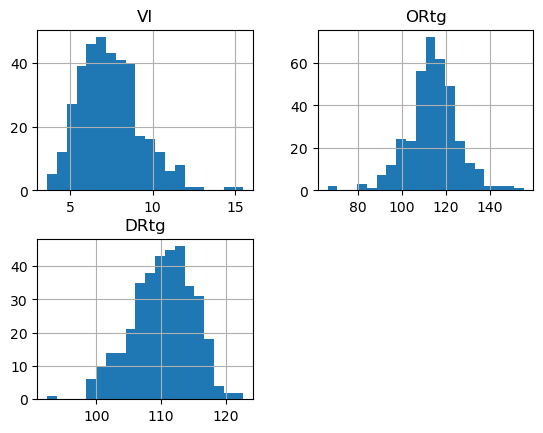

In [23]:
hist = y_train.hist(bins=20)
hist

Nachdem die Werte von Spielern die weniger als 10 Spiele bestritten haben, herausgefiltert wurden. Hat sich das Problem der Ausreißer Werte für das Datenfelde USG% behoben. Zusätzlich wurden die Datensätze mit 0 Werten für die response Variable entfernt.

In [25]:
correlation_matrix = df_mingames[correlationMatrix].corr()
print(correlation_matrix['VI'].abs().sort_values(ascending=False))

VI       1.000000
P+R+A    0.720176
TPG      0.702389
APG      0.702337
USG%     0.687926
P+A      0.685546
P+R      0.684954
2PA      0.646256
PPG      0.642133
FTA      0.630185
RPG      0.600523
MPG      0.443123
SPG      0.396869
BPG      0.276805
ORtg     0.264932
TS%      0.260833
GP       0.252768
3PA      0.247627
TO%      0.201125
eFG%     0.175825
2P%      0.144743
FT%      0.124130
DRtg     0.122814
AGE      0.036801
3P%      0.025528
Name: VI, dtype: float64


In [26]:
print(correlation_matrix['ORtg'].abs().sort_values(ascending=False))

ORtg     1.000000
TS%      0.868901
eFG%     0.821677
2P%      0.535862
RPG      0.335865
GP       0.298840
BPG      0.270568
VI       0.264932
P+R      0.256742
P+R+A    0.246485
FTA      0.225466
FT%      0.216399
MPG      0.205553
PPG      0.200944
2PA      0.199097
P+A      0.196218
DRtg     0.180788
TO%      0.178045
AGE      0.147974
SPG      0.142201
APG      0.141473
3P%      0.123086
USG%     0.115668
3PA      0.080532
TPG      0.018331
Name: ORtg, dtype: float64


In [27]:
print(correlation_matrix['DRtg'].abs().sort_values(ascending=False))

DRtg     1.000000
3P%      0.302686
TO%      0.300769
3PA      0.289300
2P%      0.260779
MPG      0.257719
APG      0.246609
BPG      0.243432
FT%      0.229686
P+A      0.226174
PPG      0.207949
eFG%     0.197673
RPG      0.185840
ORtg     0.180788
TS%      0.175230
P+R+A    0.144647
TPG      0.139952
USG%     0.133775
VI       0.122814
P+R      0.112974
SPG      0.088736
2PA      0.056650
FTA      0.030543
GP       0.017678
AGE      0.004378
Name: DRtg, dtype: float64


Ausgabe der Korrelationsmatrix für alle predictor Variablen, absteigend sortiert für jede der 3 Response Variablen. Zusätzlich wurden die Negativen Korrelationen zu positiven Werten konvertiert, um eine Liste mit den besten Korrelationswerten zu bekommen.

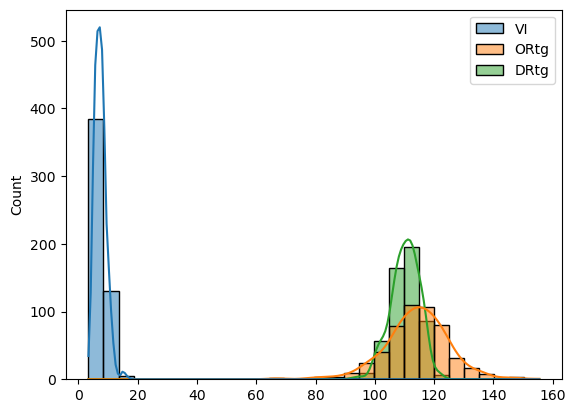

In [29]:
sns.histplot(df_mingames[responselist], kde=True, bins=30)
plt.show()

Ein Histogramm der Response Variablen, um die Verteilung der Variablen zu identifizieren. Hier ist aufgefallen, dass für die Variable "VI" ein weiteres Diagramm ausgegeben werden sollte, da der Wertebereich im Vergleich zu DRtg und ORtg deutlich kleiner ist.

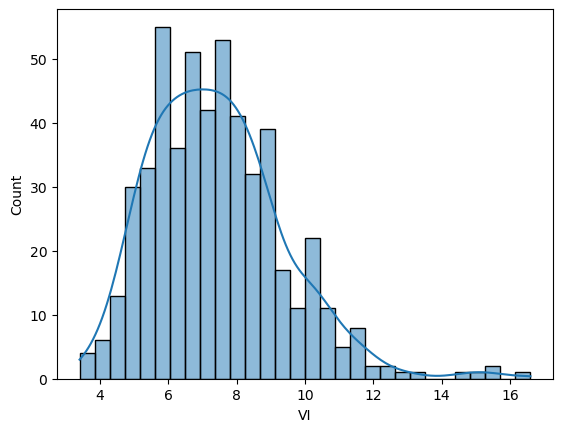

In [31]:
sns.histplot(df_mingames["VI"], kde=True, bins=30)
plt.show()

Die Verteilung der VI Werte hat eine leicht linkssteile/rechtsschiefe Verteilung.

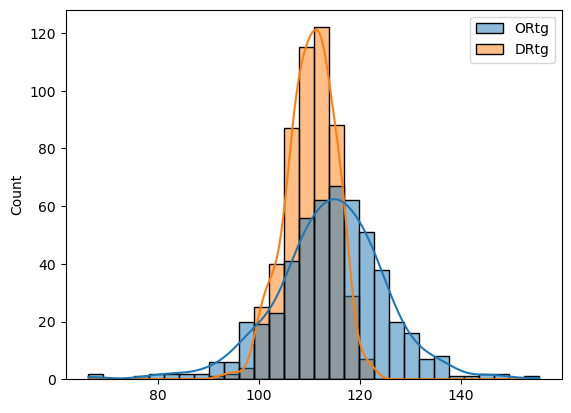

In [33]:
sns.histplot(df_mingames[["ORtg", "DRtg"]], kde=True, bins=30)
plt.show()

Die Verteilungen der Werte ORtg und DRtg sind sehr nah an einer Normalverteilung, was bedeutet das lineare Regression sehr gut auf die beiden Werte anwendbar ist.

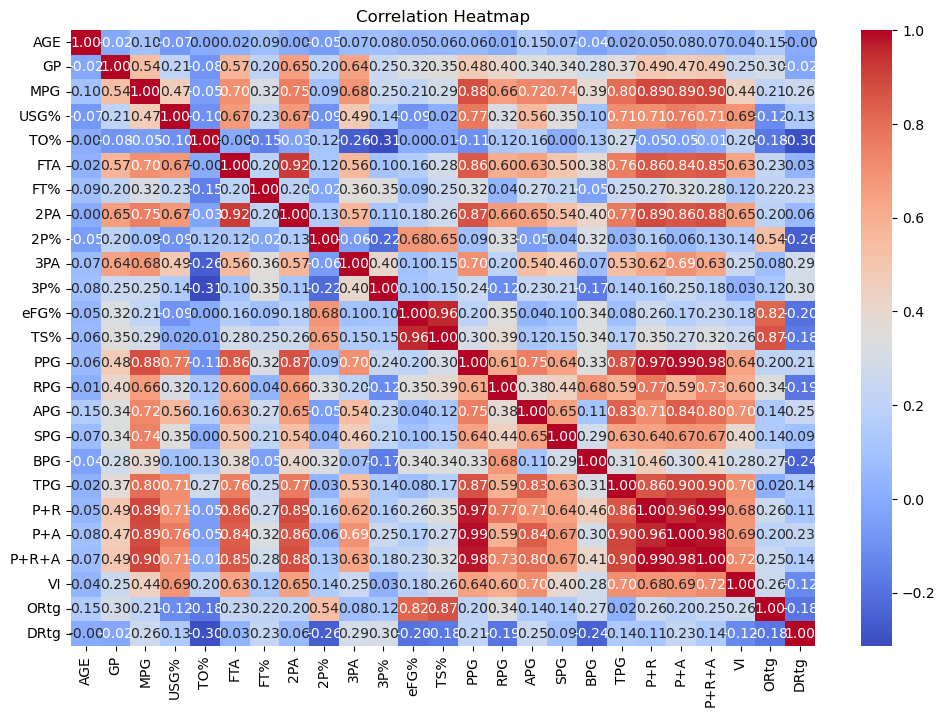

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In der "Correlation Heatmap" kann man die Korrelation zwischen unterschiedlichen Variablen auf einen Bick bekommen. In diesem Diagramm kann man beispielsweise sehen, dass die Variablen mit der höchsten Korrelation für die Response Variablen, die folgenden sind.

1. VI
   - P+R+A
   - TPG
   - APG
   - USG%
   - P+A
3. ORtg
   - TS%
   - eFG
   - 2P%
   - RPG
   - 3P%
5. DRtg
   - 3P%
   - TO%
   - 3PA
   - 2PA%
   - MPG
  
Etwas das auch aufgefallen ist, sind die Korrelationswerte, bei denen die Variablen "VI" und "ORtg" relativ hohe Werte für die Top 5 Werte besitzen zwischen 0,87 und 0,5. Beim DRtg gibt es jedoch keine Korrelationswerte die einen besseren Wert als 0,3 bzw. -0,3 abbilden. Hieraus kann man schließen, dass das Modell für den Response Wert "DRtg" vermutlich keine guten Werte liefern wird.

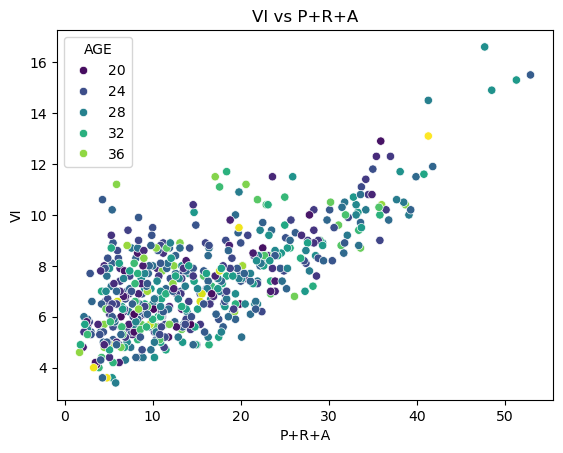

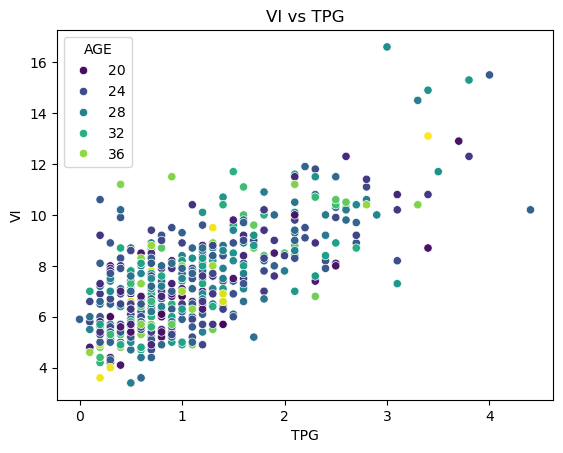

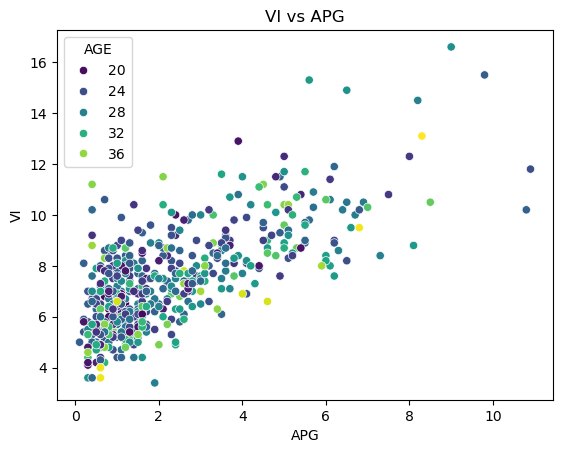

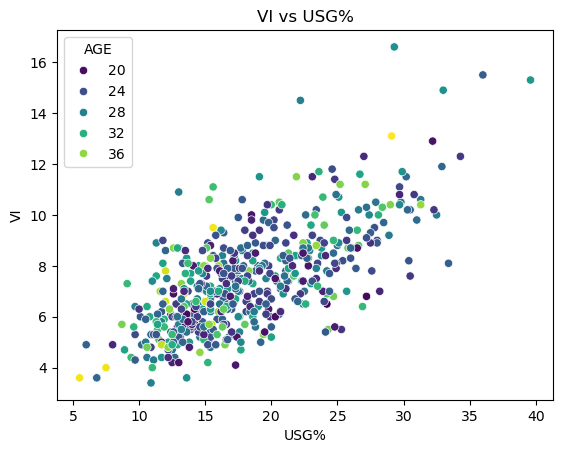

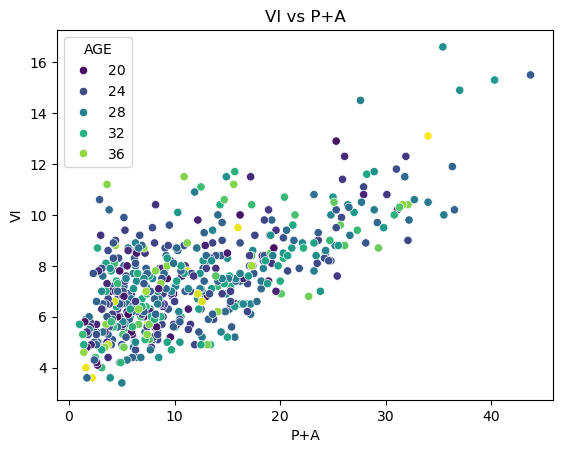

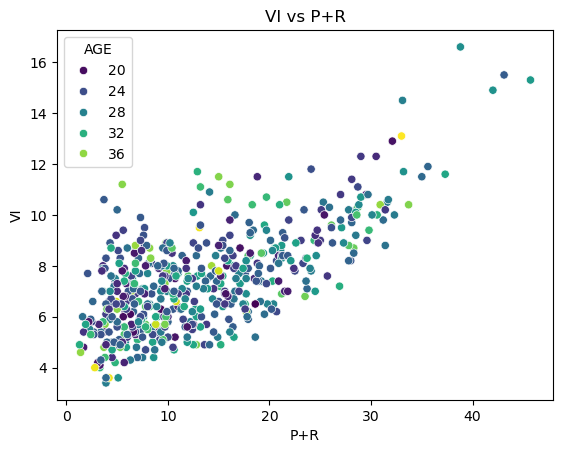

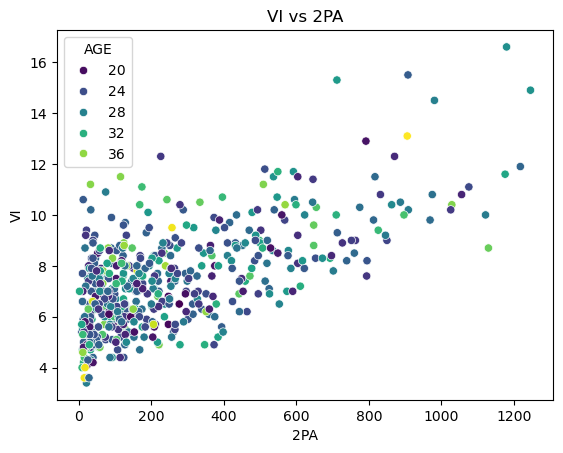

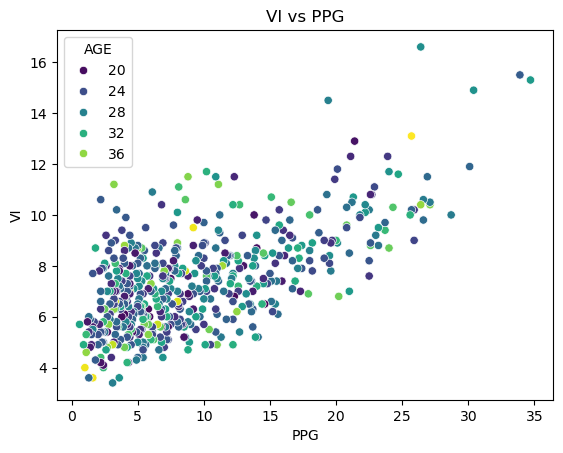

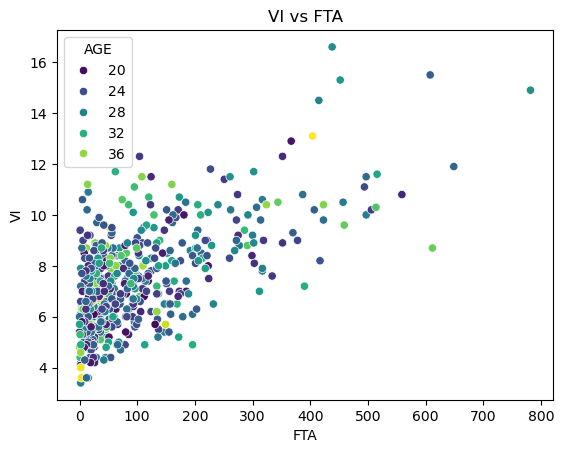

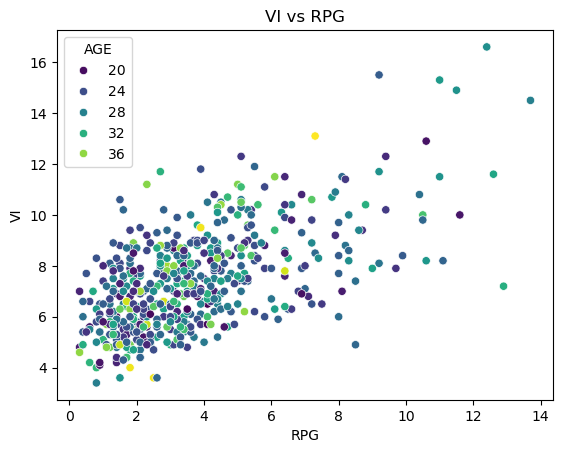

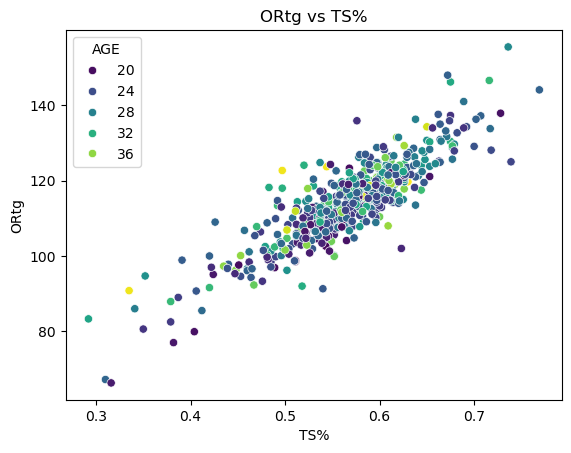

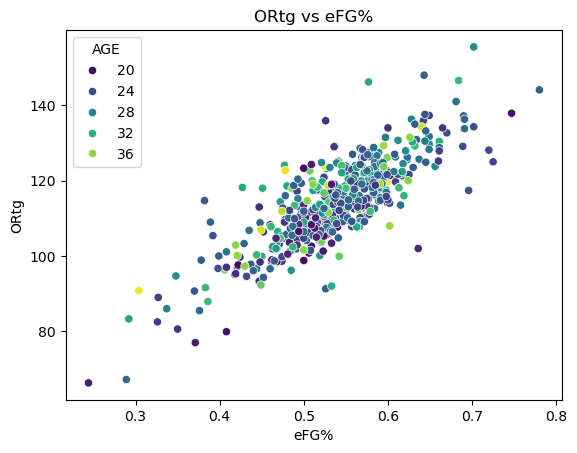

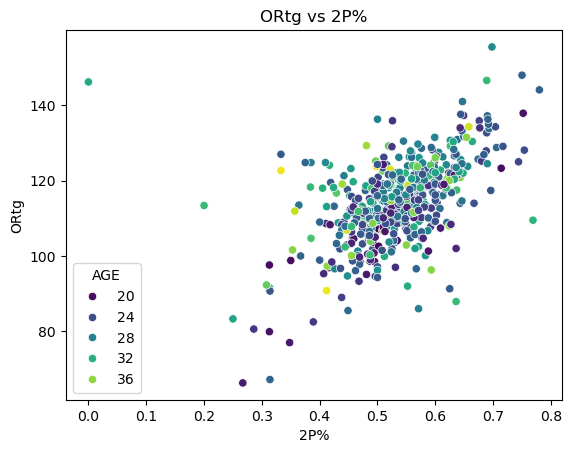

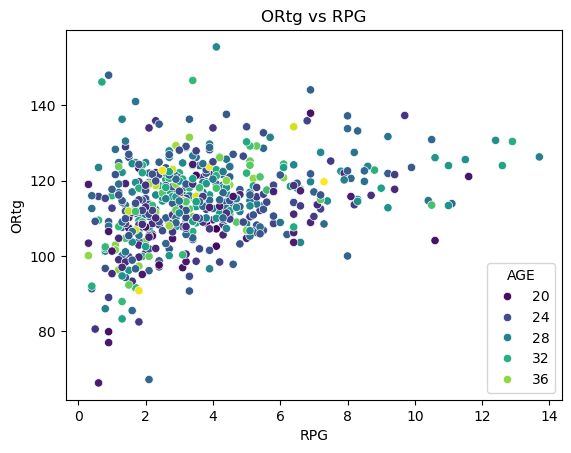

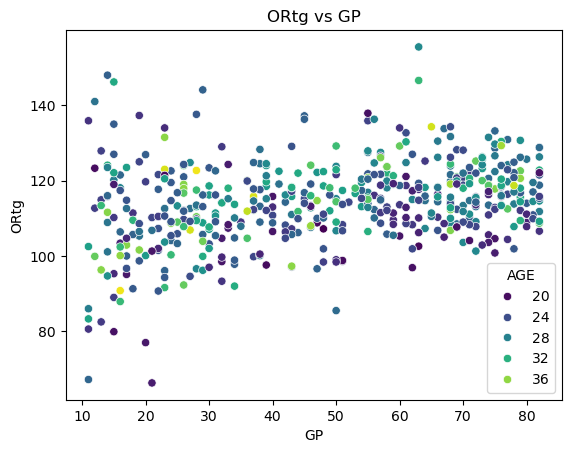

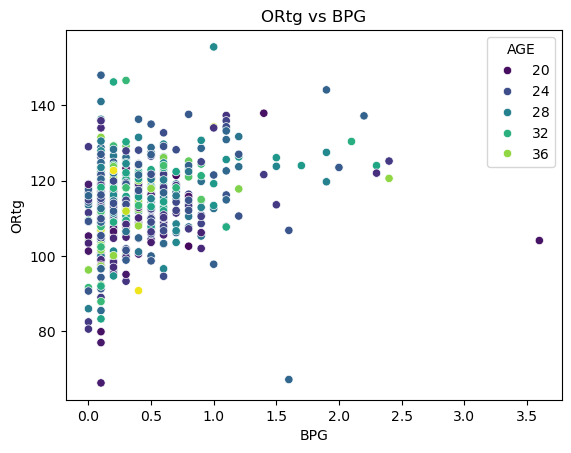

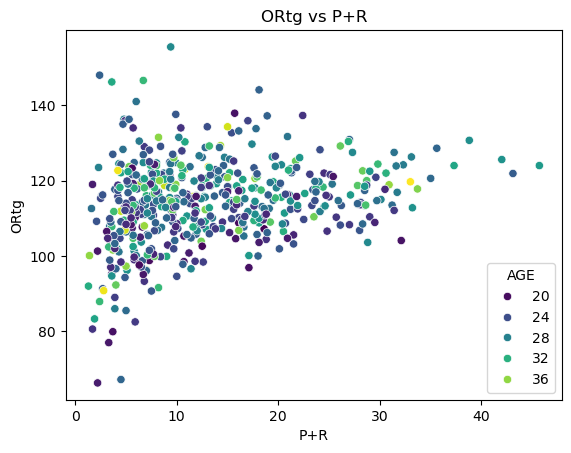

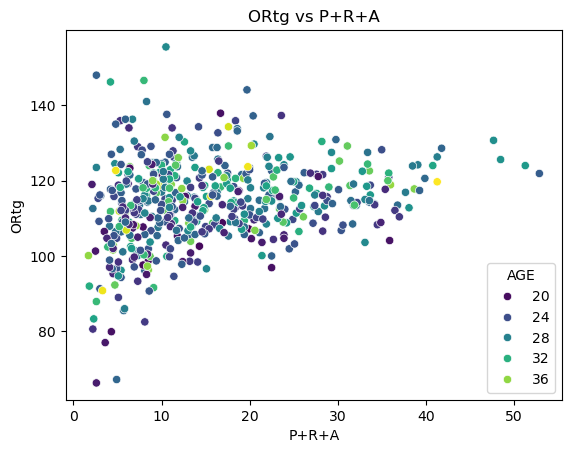

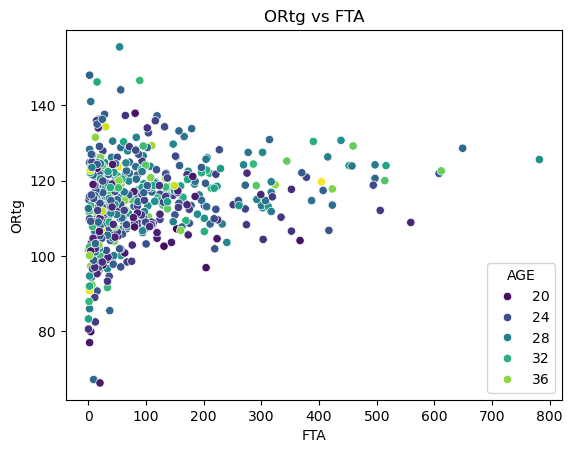

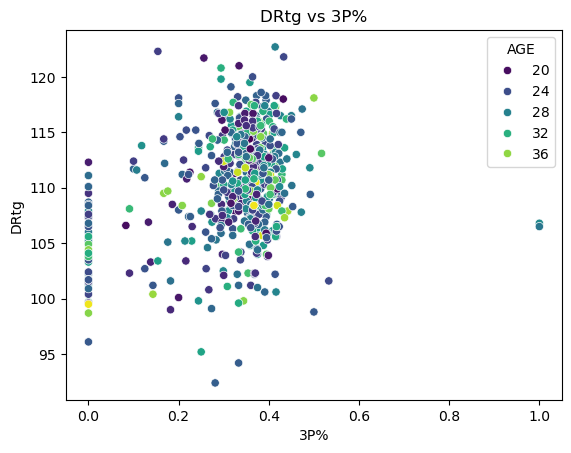

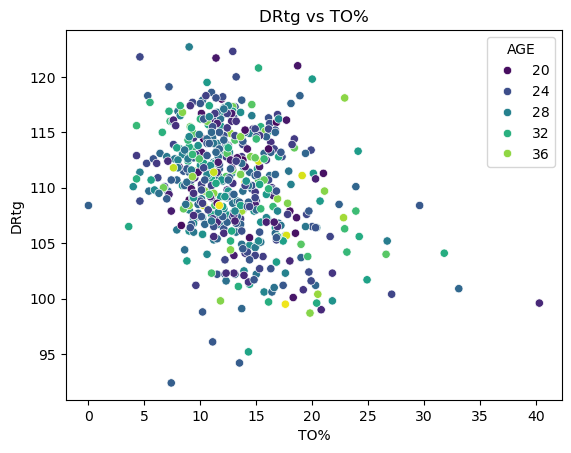

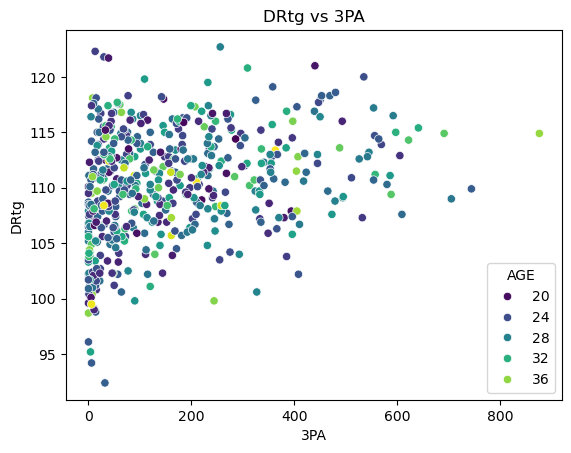

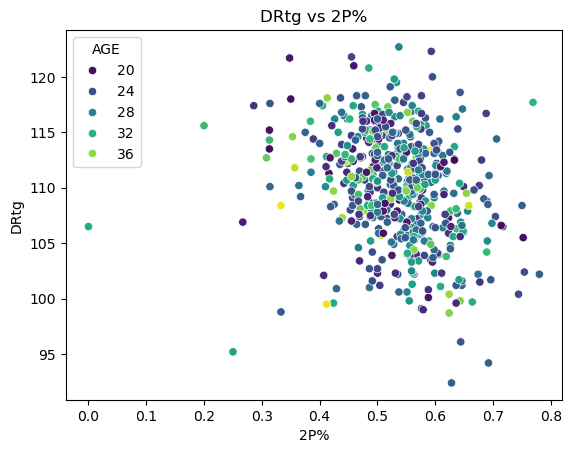

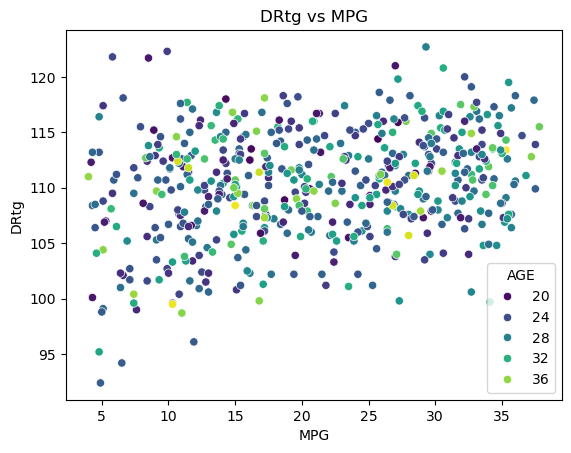

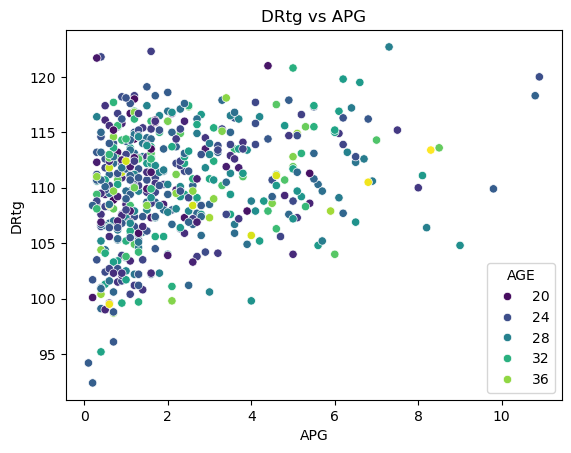

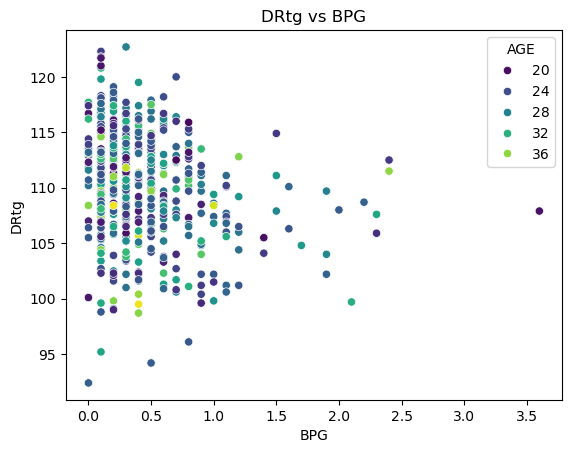

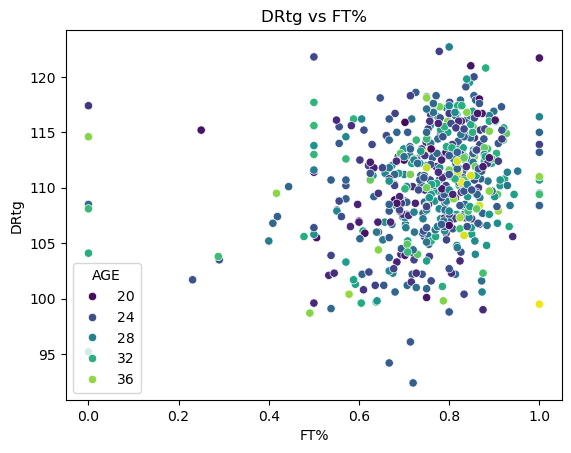

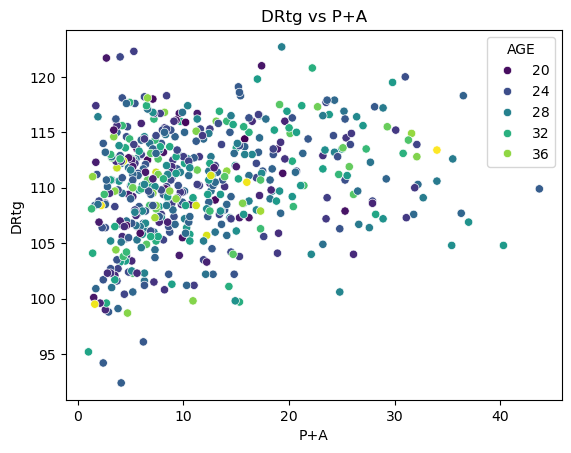

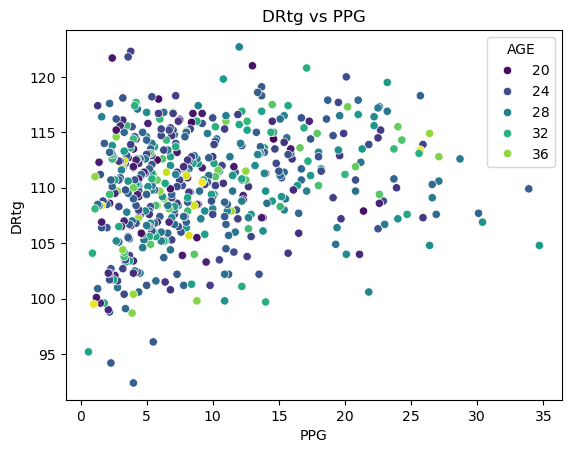

In [37]:
# Erstellen eines Scatterplot für die Top 10 Correlationen pro response
listpredictorlist = []
for re in responselist:
    predictorList = []
    top_correlations = correlation_matrix[re].abs().sort_values(ascending=False)[1:11]
    for name, value in top_correlations.items():
        if name != "VI" and name != "ORtg" and name != "DRtg":
            sns.scatterplot(data=df_mingames, x=name, y=re, hue='AGE', palette='viridis')
            plt.title(f'{re} vs {name}')
            plt.xlabel(name)
            plt.ylabel(re)
            plt.show()
            predictorList.append(name)
    listpredictorlist.append(predictorList)

Scatter Diagramme für die 10 besten Predictor Variablen für die jeweiligen Response Variablen. In diesen Diagrammen kann man sehen das es für die Variablen "VI" und "ORtg" Predictor Variabeln gibt mit einem hohen Korrelationswert, zwei gute Beispiele sind ORTG vs eFG% sowie VI vs P+R+A die eine eindeutige positive Korrelation abbilden.

In [39]:
# Model
# Lineare Regression
results = []

for re in responselist:
    counter = 0
    
    for predictor_list in listpredictorlist:
        
        for i in range(1, len(predictor_list) + 1):
            combinations = itertools.combinations(predictor_list, i)
            
            for combination in combinations:
                regscal = LinearRegression().fit(X_train[list(combination)], y_train[re])
                score = regscal.score(X_test[list(combination)], y_test[re])
                model_name = re + " Modell_Linear"
                variables = list(combination)
                
                results.append({
                    "Response Variable": re,
                    "Model Name": model_name,
                    "Variables": variables,
                    "Score (R²)": score,
                    "Predictor Count": len(variables)
                })
        
        counter += 1

results_linear_df = pd.DataFrame(results)
results_linear_df['Variables'] = results_linear_df['Variables'].apply(tuple)
results_linear_df = results_linear_df.drop_duplicates()

Für die Lineare Regression habe ich eine Methode geschrieben, die für jede der drei Response Variablen eine Liste von den 10 besten prediction Variablen nutzt. Um alle möglichen Kombinationen der Liste zu testet. Die Ergebnisse werden in einen Dataframe geschrieben. Der Dataframe wird sortiert, nach den besten Score R² und ausgegeben. Ich gebe für jeden Response Variable einen sortierten Dataframe aus, von dem man die Ergebnisse Auslesen kann. Bei den Modellen für die Variable "VI" werden die drei besten Ergebnisse mit den folgenden predictor Variablen erzeugt:

1. (P+R+A, TPG, USG%, PPG, FTA)
2. (P+R+A, TPG, USG%, 2PA, PPG)
3. (P+R+A, TPG, USG%, 2PA, PPG, FTA)

Top 10 Korrelationsmatrix
P+R+A    0.720176
TPG      0.702389
APG      0.702337
USG%     0.687926
P+A      0.685546
P+R      0.684954
2PA      0.646256
PPG      0.642133
FTA      0.630185
RPG      0.600523


In [41]:
results_linear_df[results_linear_df["Response Variable"] == "ORtg"].sort_values(ascending=False, by = "Score (R²)")

,Response Variable,Model Name,Variables,Score (R²),Predictor Count
4064,ORtg,ORtg Modell,"(TS%, eFG%, RPG, BPG, P+R, P+R+A, FTA)",0.701781,7
4087,ORtg,ORtg Modell,"(TS%, eFG%, RPG, GP, BPG, P+R, P+R+A, FTA)",0.701624,8
3990,ORtg,ORtg Modell,"(TS%, eFG%, RPG, P+R, P+R+A, FTA)",0.701610,6
4063,ORtg,ORtg Modell,"(TS%, eFG%, RPG, GP, P+R, P+R+A, FTA)",0.701398,7
3984,ORtg,ORtg Modell,"(TS%, eFG%, RPG, GP, P+R, P+R+A)",0.698540,6
...,...,...,...,...,...
2576,ORtg,ORtg Modell,"(TPG, APG)",-0.025367,2
2577,ORtg,ORtg Modell,"(TPG, USG%)",-0.033876,2
2584,ORtg,ORtg Modell,"(APG, USG%)",-0.048295,2
2560,ORtg,ORtg Modell,"(USG%,)",-0.051970,1


Bei den Modellen für die Variable "ORtg" liefern die folgenden 3 predictor Kombinationen, die besten Ergebnisse:

1. (TS%, eFG%, RPG, BPG, P+R, P+R+A, FTA)
2. (TS%, eFG%, RPG, GP, BPG, P+R, P+R+A, FTA)
3. (TS%, eFG%, RPG, P+R, P+R+A, FTA)

Top 10 Korrelationsmatrix 
TS%      0.868901
eFG%     0.821677
2P%      0.535862
RPG      0.335865
GP       0.298840
BPG      0.270568
P+R      0.256742
P+R+A    0.246485
FTA      0.225466
FT%      0.216399

In [43]:
results_linear_df[results_linear_df["Response Variable"] == "DRtg"].sort_values(ascending=False, by = "Score (R²)")

,Response Variable,Model Name,Variables,Score (R²),Predictor Count
7669,DRtg,DRtg Modell,"(TO%, 3PA, 2P%, MPG, APG, BPG, FT%, P+A, PPG)",0.316329,9
7657,DRtg,DRtg Modell,"(TO%, 3PA, MPG, APG, BPG, FT%, P+A, PPG)",0.313109,8
7300,DRtg,DRtg Modell,"(3P%, TO%, 3PA, MPG, APG, BPG)",0.312968,6
7632,DRtg,DRtg Modell,"(3P%, TO%, 3PA, MPG, APG, BPG, P+A, PPG)",0.312556,8
7670,DRtg,DRtg Modell,"(3P%, TO%, 3PA, 2P%, MPG, APG, BPG, FT%, P+A, ...",0.312348,10
...,...,...,...,...,...
5264,DRtg,DRtg Modell,"(USG%, 2PA, FTA)",0.001878,3
5122,DRtg,DRtg Modell,"(FTA,)",0.000819,1
6141,DRtg,DRtg Modell,"(GP,)",-0.000628,1
5120,DRtg,DRtg Modell,"(2PA,)",-0.001905,1


Bei den Modellen für die Variable "DRtg" liefern die folgenden 3 predictor Kombinationen, die besten Ergebnisse:

1. (TO%, 3PA, 2P%, MPG, APG, BPG, FT%, P+A, PPG)
2. (TO%, 3PA, MPG, APG, BPG, FT%, P+A, PPG)
3. (3P%, TO%, 3PA, MPG, APG, BPG)

Top 10 Korrelationsmatrix 
3P%      0.302686
TO%      0.300769
3PA      0.289300
2P%      0.260779
MPG      0.257719
APG      0.246609
BPG      0.243432
FT%      0.229686
P+A      0.226174
PPG      0.207949

In [45]:
# Lineare Regression
resultsscaliert = []
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[predictorListCon])
X_test_scaled = scaler.transform(X_test[predictorListCon])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=predictorListCon)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=predictorListCon)

for re in responselist:
    counter = 0
    
    for predictor_list in listpredictorlist:
        
        for i in range(1, len(predictor_list) + 1):
            combinations = itertools.combinations(predictor_list, i)
            
            for combination in combinations:
                regscal = LinearRegression().fit(X_train_scaled[list(combination)], y_train[re])
                score = regscal.score(X_test_scaled[list(combination)], y_test[re])
                model_name = re + " Modell"
                variables = list(combination)
                
                resultsscaliert.append({
                    "Response Variable": re,
                    "Model Name": model_name,
                    "Variables": variables,
                    "Score (R²)": score,
                    "Predictor Count": len(variables)
                })
        
        counter += 1

resultsscaliert_df = pd.DataFrame(resultsscaliert)
resultsscaliert_df['Variables'] = resultsscaliert_df['Variables'].apply(tuple)
resultsscaliert_df = resultsscaliert_df.drop_duplicates()
resultsscaliert_df[resultsscaliert_df["Response Variable"] == "VI"].sort_values(ascending=False, by = "Score (R²)")

,Response Variable,Model Name,Variables,Score (R²),Predictor Count
418,VI,VI Modell,"(P+R+A, TPG, USG%, PPG, FTA)",0.788996,5
415,VI,VI Modell,"(P+R+A, TPG, USG%, 2PA, PPG)",0.788480,5
688,VI,VI Modell,"(P+R+A, TPG, USG%, 2PA, PPG, FTA)",0.787809,6
185,VI,VI Modell,"(P+R+A, TPG, USG%, PPG)",0.787336,4
236,VI,VI Modell,"(P+R+A, USG%, PPG, FTA)",0.784856,4
...,...,...,...,...,...
1534,VI,VI Modell,"(3P%,)",-0.033567,1
1535,VI,VI Modell,"(TO%,)",-0.035341,1
1546,VI,VI Modell,"(3P%, 2P%)",-0.039141,2
1554,VI,VI Modell,"(TO%, 2P%)",-0.045807,2


Bei einem weiteren Versuch die LinearRegression anzuwenden, habe ich die Skalierung der predictor Variablen angepasst, so dass die Werte der unterschiedlichen Datenfelder nicht mehr, um einen Faktor von 1000 auseinander liegen können. Ein Beispiel wäre hier das Feld FTA mit einem Maximal von ~1200 und TS% mit einem Wert von Maximal 1. Bei den Ergebnissen konnte ich jedoch keinen Unterschied feststellen.

In [47]:
resultsscaliert_df[resultsscaliert_df["Response Variable"] == "ORtg"].sort_values(ascending=False, by = "Score (R²)")

,Response Variable,Model Name,Variables,Score (R²),Predictor Count
4064,ORtg,ORtg Modell,"(TS%, eFG%, RPG, BPG, P+R, P+R+A, FTA)",0.701781,7
4087,ORtg,ORtg Modell,"(TS%, eFG%, RPG, GP, BPG, P+R, P+R+A, FTA)",0.701624,8
3990,ORtg,ORtg Modell,"(TS%, eFG%, RPG, P+R, P+R+A, FTA)",0.701610,6
4063,ORtg,ORtg Modell,"(TS%, eFG%, RPG, GP, P+R, P+R+A, FTA)",0.701398,7
3984,ORtg,ORtg Modell,"(TS%, eFG%, RPG, GP, P+R, P+R+A)",0.698540,6
...,...,...,...,...,...
2576,ORtg,ORtg Modell,"(TPG, APG)",-0.025367,2
2577,ORtg,ORtg Modell,"(TPG, USG%)",-0.033876,2
2584,ORtg,ORtg Modell,"(APG, USG%)",-0.048295,2
2560,ORtg,ORtg Modell,"(USG%,)",-0.051970,1


In [48]:
resultsscaliert_df[resultsscaliert_df["Response Variable"] == "DRtg"].sort_values(ascending=False, by = "Score (R²)")

,Response Variable,Model Name,Variables,Score (R²),Predictor Count
7669,DRtg,DRtg Modell,"(TO%, 3PA, 2P%, MPG, APG, BPG, FT%, P+A, PPG)",0.316329,9
7657,DRtg,DRtg Modell,"(TO%, 3PA, MPG, APG, BPG, FT%, P+A, PPG)",0.313109,8
7300,DRtg,DRtg Modell,"(3P%, TO%, 3PA, MPG, APG, BPG)",0.312968,6
7632,DRtg,DRtg Modell,"(3P%, TO%, 3PA, MPG, APG, BPG, P+A, PPG)",0.312556,8
7670,DRtg,DRtg Modell,"(3P%, TO%, 3PA, 2P%, MPG, APG, BPG, FT%, P+A, ...",0.312348,10
...,...,...,...,...,...
5264,DRtg,DRtg Modell,"(USG%, 2PA, FTA)",0.001878,3
5122,DRtg,DRtg Modell,"(FTA,)",0.000819,1
6141,DRtg,DRtg Modell,"(GP,)",-0.000628,1
5120,DRtg,DRtg Modell,"(2PA,)",-0.001905,1


In [49]:
# Lasso Regression
resultslasso = []

for re in responselist:
    counter = 0
    for predictor_list in listpredictorlist:
        for i in range(1, len(predictor_list) + 1):
            combinations = itertools.combinations(predictor_list, i)
            for combination in combinations:
                lasso_model = Lasso(alpha=0.1, random_state=42, max_iter=5000, tol=0.01)
                lasso_model.fit(X_train[list(combination)], y_train[re])
                y_pred = lasso_model.predict(X_test[list(combination)])
                
                mse = mean_squared_error(y_test[re], y_pred)
                r2 = r2_score(y_test[re], y_pred)
                model_name = f"{re} Modell"
                variables = list(combination)
                
                resultslasso.append({
                    "Response Variable": re,
                    "Model Name": model_name,
                    "Variables": variables,
                    "Score (R²)": r2,
                    "Mean Squared Error": mse,
                    "Predictor Count": len(variables)
                })
                
            counter += 1

resultslasso_df = pd.DataFrame(resultslasso)
resultslasso_df['Variables'] = resultslasso_df['Variables'].apply(tuple)
resultslasso_df = resultslasso_df.drop_duplicates()
resultslasso_df[resultslasso_df["Response Variable"] == "VI"].sort_values(ascending=False, by = "Score (R²)")

,Response Variable,Model Name,Variables,Score (R²),Mean Squared Error,Predictor Count
493,VI,VI Modell,"(P+R+A, USG%, 2PA, PPG, RPG)",0.769549,0.714241,5
689,VI,VI Modell,"(P+R+A, TPG, USG%, 2PA, PPG, RPG)",0.769549,0.714241,6
233,VI,VI Modell,"(P+R+A, USG%, 2PA, PPG)",0.769310,0.714980,4
415,VI,VI Modell,"(P+R+A, TPG, USG%, 2PA, PPG)",0.769310,0.714981,5
492,VI,VI Modell,"(P+R+A, USG%, 2PA, PPG, FTA)",0.768842,0.716432,5
...,...,...,...,...,...,...
1068,VI,VI Modell,"(TS%, eFG%, 2P%)",-0.032336,3.199538,3
1534,VI,VI Modell,"(3P%,)",-0.032336,3.199538,1
1541,VI,VI Modell,"(FT%,)",-0.032336,3.199538,1
1546,VI,VI Modell,"(3P%, 2P%)",-0.032336,3.199538,2


Bei der Lasso Regression wurde dieselbe Methodik angewendet, wie schon bei der Linearen Regression. Damit alle Kombinationen der Top 10 predictor Variablen erproben werden. Im ersten Schritt wurden die predictor Variablen genutzt, ohne die Skalierung dieser Variablen anzupassen.

Linear Regression
1. (P+R+A, TPG, USG%, PPG, FTA) 	    0.788996 	
2. (P+R+A, TPG, USG%, 2PA, PPG) 	    0.788480 	
3. (P+R+A, TPG, USG%, 2PA, PPG, FTA) 	0.787809

Lasso Regression
1. (P+R+A, USG%, 2PA, PPG, RPG)         0.769549
2. (P+R+A, TPG, USG%, 2PA, PPG, RPG)    0.769549
3. (P+R+A, USG%, 2PA, PPG)              0.769310 	

Im Vergleich sind die Ergebnisse bei der Variable "VI", für die Lasso Regression sehr ähnlich. Jedoch sind die Werte etwas schlechter im Vergleich mit der Linearen Regression. Zusätzlich kann man sehen das für die besten Ergebnisse der Lasso Regression andere predictor Variablen genutzt werden. In beiden Methoden sind die Variablen P+R+A, USG% und PPG in allen 6 Modellen vorhanden.

In [51]:
resultslasso_df[resultslasso_df["Response Variable"] == "ORtg"].sort_values(ascending=False, by = "Score (R²)")

,Response Variable,Model Name,Variables,Score (R²),Mean Squared Error,Predictor Count
4054,ORtg,ORtg Modell,"(TS%, eFG%, 2P%, RPG, P+R, P+R+A, FTA)",0.730898,33.823656,7
3899,ORtg,ORtg Modell,"(TS%, RPG, P+R, P+R+A, FTA)",0.730898,33.823656,5
4085,ORtg,ORtg Modell,"(TS%, eFG%, 2P%, RPG, BPG, P+R, P+R+A, FTA)",0.730898,33.823656,8
4015,ORtg,ORtg Modell,"(TS%, RPG, BPG, P+R, P+R+A, FTA)",0.730898,33.823656,6
4070,ORtg,ORtg Modell,"(TS%, 2P%, RPG, BPG, P+R, P+R+A, FTA)",0.730898,33.823656,7
...,...,...,...,...,...,...
2576,ORtg,ORtg Modell,"(TPG, APG)",-0.013850,127.431696,2
2577,ORtg,ORtg Modell,"(TPG, USG%)",-0.033528,129.905108,2
2584,ORtg,ORtg Modell,"(APG, USG%)",-0.045715,131.436913,2
2560,ORtg,ORtg Modell,"(USG%,)",-0.051263,132.134202,1


Lineare Regression
(TS%, eFG%, RPG, BPG, P+R, P+R+A, FTA) 	    0.701781 	
(TS%, eFG%, RPG, GP, BPG, P+R, P+R+A, FTA) 	0.701624 	
(TS%, eFG%, RPG, P+R, P+R+A, FTA) 	        0.701610 	

Lasso Regression
(TS%, eFG%, 2P%, RPG, P+R, P+R+A, FTA) 	    0.730898 	
(TS%, RPG, P+R, P+R+A, FTA) 	            0.730898 	
(TS%, eFG%, 2P%, RPG, BPG, P+R, P+R+A, FTA) 0.730898 

Im Vergleich sind die Ergebnisse bei der Variable "ORtg", für die Lasso Regression sehr ähnlich. Jedoch sind die Werte etwas besser im Vergleich mit der Linearen Regression. Zusätzlich kann man sehen das für die besten Ergebnisse der Lasso Regression andere predictor Variablen genutzt werden. In beiden Methoden sind die Variablen TS%, RPG, P+R+A, P+R und FTA in allen 6 Modellen vorhanden.

In [53]:
resultslasso_df[resultslasso_df["Response Variable"] == "DRtg"].sort_values(ascending=False, by = "Score (R²)")

,Response Variable,Model Name,Variables,Score (R²),Mean Squared Error,Predictor Count
7580,DRtg,DRtg Modell,"(TO%, 3PA, 2P%, MPG, APG, BPG, P+A)",0.302304,21.130833,7
7432,DRtg,DRtg Modell,"(TO%, 3PA, MPG, APG, BPG, P+A)",0.302304,21.130833,6
7651,DRtg,DRtg Modell,"(TO%, 3PA, 2P%, MPG, APG, BPG, FT%, P+A)",0.302304,21.130833,8
7594,DRtg,DRtg Modell,"(TO%, 3PA, MPG, APG, BPG, FT%, P+A)",0.302304,21.130833,7
7616,DRtg,DRtg Modell,"(3P%, TO%, 3PA, 2P%, MPG, APG, BPG, P+A)",0.302298,21.131005,8
...,...,...,...,...,...,...
6137,DRtg,DRtg Modell,"(TS%,)",-0.003296,30.386397,1
6182,DRtg,DRtg Modell,"(TS%, eFG%, 2P%)",-0.003296,30.386397,3
6154,DRtg,DRtg Modell,"(eFG%, 2P%)",-0.003296,30.386397,2
6146,DRtg,DRtg Modell,"(TS%, eFG%)",-0.003296,30.386397,2


Lineare Regression
(TO%, 3PA, 2P%, MPG, APG, BPG, FT%, P+A, PPG) 	0.316329 	
(TO%, 3PA, MPG, APG, BPG, FT%, P+A, PPG) 	    0.313109 	
(3P%, TO%, 3PA, MPG, APG, BPG) 	                0.312968 	

Lasso Regression
(TO%, 3PA, 2P%, MPG, APG, BPG, P+A) 	        0.302304	
(TO%, 3PA, MPG, APG, BPG, P+A) 	                0.302304	
(TO%, 3PA, 2P%, MPG, APG, BPG, FT%, P+A) 	    0.302304

Im Vergleich sind die Ergebnisse bei der Variable "DRtg", für die Lasso Regression sehr ähnlich. Jedoch sind die Werte etwas schlechter, im Vergleich mit der Linearen Regression. Zusätzlich kann man sehen das für die besten Ergebnisse der Lasso Regression andere predictor Variablen genutzt werden. In beiden Methoden sind die Variablen TO%, 3PA, MPG, BPG, und APG in allen 6 Modellen vorhanden.

In [55]:
resultslasso = []

for re in responselist:
    counter = 0
    for predictor_list in listpredictorlist:
        for i in range(1, len(predictor_list) + 1):
            combinations = itertools.combinations(predictor_list, i)
            for combination in combinations:
                lasso_model = Lasso(alpha=0.1, random_state=42, max_iter=5000, tol=0.01)
                lasso_model.fit(X_train_scaled[list(combination)], y_train[re])
                
                y_pred = lasso_model.predict(X_test_scaled[list(combination)])
                
                mse = mean_squared_error(y_test[re], y_pred)
                r2 = r2_score(y_test[re], y_pred)
                
                model_name = f"{re} Modell"
                variables = list(combination)
                
                resultslasso.append({
                    "Response Variable": re,
                    "Model Name": model_name,
                    "Variables": variables,
                    "Score (R²)": r2,
                    "Mean Squared Error": mse,
                    "Predictor Count": len(variables)
                })
            counter += 1

resultslassoscal_df = pd.DataFrame(resultslasso)
resultslassoscal_df['Variables'] = resultslassoscal_df['Variables'].apply(tuple)
resultslassoscal_df = resultslassoscal_df.drop_duplicates()
resultslassoscal_df[resultslassoscal_df["Response Variable"] == "VI"].sort_values(ascending=False, by = "Score (R²)")

,Response Variable,Model Name,Variables,Score (R²),Mean Squared Error,Predictor Count
866,VI,VI Modell,"(P+R+A, TPG, APG, USG%, PPG, FTA, RPG)",0.694620,0.946471,7
650,VI,VI Modell,"(P+R+A, TPG, APG, USG%, PPG, RPG)",0.694620,0.946471,6
715,VI,VI Modell,"(P+R+A, APG, USG%, P+A, PPG, RPG)",0.694552,0.946680,6
999,VI,VI Modell,"(P+R+A, APG, USG%, P+A, 2PA, PPG, FTA, RPG)",0.694552,0.946680,8
998,VI,VI Modell,"(P+R+A, APG, USG%, P+A, P+R, PPG, FTA, RPG)",0.694552,0.946680,8
...,...,...,...,...,...,...
1607,VI,VI Modell,"(3P%, 2P%, FT%)",-0.028429,3.187429,3
1571,VI,VI Modell,"(2P%, FT%)",-0.028429,3.187429,2
1534,VI,VI Modell,"(3P%,)",-0.032336,3.199538,1
1025,VI,VI Modell,"(2P%,)",-0.034497,3.206235,1


Bei der Lasso Regression wurde dieselbe Methodik angewendet, wie schon bei der Linearen Regression. Damit alle Kombinationen der Top 10 predictor Variablen erproben werden. Im zweiten Schritt wurden die predictor Variablen genutzt, bei denen die Skalierung angepasst war.

Lasso Regression
1. (P+R+A, USG%, 2PA, PPG, RPG)         0.769549
2. (P+R+A, TPG, USG%, 2PA, PPG, RPG)    0.769549
3. (P+R+A, USG%, 2PA, PPG)              0.769310

Lasso Regression Skaliert
1. (P+R+A, TPG, APG, USG%, PPG, FTA, RPG) 	        0.694620
2. (P+R+A, TPG, APG, USG%, PPG, RPG)    	        0.694620
3. (P+R+A, APG, USG%, P+A, PPG, RPG) 	            0.694552

Die Ergebnisse für die Variable "VI" sind deutlich schlechter, zusätzlich ist auffällig das mehr Variablen in die besten Modelle eingeflossen sind.

In [57]:
resultslassoscal_df[resultslassoscal_df["Response Variable"] == "ORtg"].sort_values(ascending=False, by = "Score (R²)")

,Response Variable,Model Name,Variables,Score (R²),Mean Squared Error,Predictor Count
4072,ORtg,ORtg Modell,"(TS%, RPG, GP, BPG, P+R, P+R+A, FTA)",0.674475,40.915505,7
4061,ORtg,ORtg Modell,"(TS%, eFG%, RPG, GP, BPG, P+R, FTA)",0.674475,40.915505,7
4012,ORtg,ORtg Modell,"(TS%, RPG, GP, BPG, P+R, FTA)",0.674475,40.915505,6
4087,ORtg,ORtg Modell,"(TS%, eFG%, RPG, GP, BPG, P+R, P+R+A, FTA)",0.674475,40.915505,8
4064,ORtg,ORtg Modell,"(TS%, eFG%, RPG, BPG, P+R, P+R+A, FTA)",0.674460,40.917433,7
...,...,...,...,...,...,...
2576,ORtg,ORtg Modell,"(TPG, APG)",-0.013717,127.415012,2
2577,ORtg,ORtg Modell,"(TPG, USG%)",-0.030872,129.571204,2
2584,ORtg,ORtg Modell,"(APG, USG%)",-0.040801,130.819175,2
2560,ORtg,ORtg Modell,"(USG%,)",-0.048187,131.747651,1


Lasso Regression
1. (TS%, eFG%, 2P%, RPG, P+R, P+R+A, FTA) 	    0.730898 	
2. (TS%, RPG, P+R, P+R+A, FTA) 	                0.730898 	
3. (TS%, eFG%, 2P%, RPG, BPG, P+R, P+R+A, FTA)  0.730898

Lasso Regression Skaliert
1. (TS%, eFG%, RPG, GP, BPG, P+R, FTA) 	        0.675545
2. (TS%, RPG, GP, BPG, P+R, FTA)    	        0.675545
3. (TS%, RPG, GP, BPG, P+R, P+R+A, FTA)         0.675545

Die Ergebnisse für die Variable "ORtg" sind deutlich schlechter.

In [59]:
resultslassoscal_df[resultslassoscal_df["Response Variable"] == "DRtg"].sort_values(ascending=False, by = "Score (R²)")

,Response Variable,Model Name,Variables,Score (R²),Mean Squared Error,Predictor Count
7342,DRtg,DRtg Modell,"(3P%, TO%, MPG, APG, BPG, PPG)",0.302394,21.128099,6
7666,DRtg,DRtg Modell,"(3P%, TO%, 3PA, MPG, APG, BPG, FT%, P+A, PPG)",0.302370,21.128844,9
7631,DRtg,DRtg Modell,"(3P%, TO%, 3PA, MPG, APG, BPG, FT%, PPG)",0.302330,21.130052,8
7632,DRtg,DRtg Modell,"(3P%, TO%, 3PA, MPG, APG, BPG, P+A, PPG)",0.302315,21.130505,8
7517,DRtg,DRtg Modell,"(3P%, TO%, 3PA, MPG, APG, BPG, PPG)",0.302314,21.130523,7
...,...,...,...,...,...,...
6175,DRtg,DRtg Modell,"(GP, FTA)",0.002755,30.203142,2
5122,DRtg,DRtg Modell,"(FTA,)",-0.000702,30.307843,1
5120,DRtg,DRtg Modell,"(2PA,)",-0.001296,30.325836,1
5164,DRtg,DRtg Modell,"(2PA, FTA)",-0.001296,30.325836,2


Lasso Regression
1. (TO%, 3PA, 2P%, MPG, APG, BPG, P+A) 	        0.302304	
2. (TO%, 3PA, MPG, APG, BPG, P+A) 	            0.302304	
3. (TO%, 3PA, 2P%, MPG, APG, BPG, FT%, P+A) 	0.302304

Lasso Regression Skaliert
1. (3P%, TO%, 3PA, MPG, APG, BPG, FT%, PPG)     0.302996
2. (3P%, TO%, 3PA, MPG, APG, BPG, PPG)  	    0.302996
3. (3P%, TO%, 3PA, MPG, APG, BPG, P+A, PPG)     0.302996

Die Ergebnisse für die Variable "DRtg" sind fast identisch, die genutzten Variablen unterscheiden sich jedoch etwas.

Conclusion

Generelles zu den Daten:
Die Daten sind im Großen und Ganzen, ziemlich gut für lineare Regression geeignet. Es gab ein paar Probleme mit den Daten, die jedoch behoben werden konnten. Hierunter zählen unter andrem:

1. Einige 0 Werte in den Predictor Variablen
   - Wurde behandelt durch das Filtern auf eine minimale Anzahl an gespielten Spielen.
   - Muss nicht immer beachtet werden, da es durchaus Werte gibt, die hier einen 0 Wert enthalten können, aufgrund der Rolle und Spielzeit des Spielers, kann es sein das er einen 0 Wert bei "FTA" hat, da er nicht gefoult wurde.
2. Nicht realistische Ausreißer
   - Konnte behandelt werden, durch Filtern des Datensatzes auf eine minimale Anzahl an Spielen, an denen ein Spieler teilgenommen haben muss.
3. Einige 0 Werte in den Response Variablen
   - Spieler die, nachdem Filter auf die Anzahl an Spielen noch einen 0 Wert in einer Response Variablen hatte, wurde herausgefiltert.
4. Fehlende Werte in der Spalte Rank
   - Die Spalte wurde verworfen
5. Nicht Skalierte Daten
    - Die Daten wurden skaliert und nicht skaliert modelliert. Um zu identifizieren, ob die Skalierung sinnvoll ist.
  
Generelles zur Analyse:
Bei der Analyse ist aufgefallen das zwei der 3 Response Variablen starke Korrelationen zu bestimmten predictor Variablen besitzen. Die dritte Variable hatte jedoch keine starken Korrelationen aufgewiesen, dies ist auch bei der Erstellung der Modelle aufgefallen.

Histogramm der Response Variablen:
Es wurde festgestellt das die Variablen ORtg und DRtg sich in einem anderen Wertebereich befinden. Die beiden Response Variablen besitzen jedoch eine Normalverteilung. Bei der Variable VI ist der Wertebereich deutlich niedriger und die Verteilung der Werte bildet eine linkssteile/rechtsschiefe Verteilung ab.

Korrelation:
Bei der Betrachtung der correlation_matrix ist aufgefallen, dass die Variablen ORtg und VI starke positive Korrelationen zu anderen Variablen enthalten mit Werten von bis zu 0,72 (VI) und 0,86 (ORtg). Bei der Variable DRtg ist dies nicht der Fall bei dieser Variable sind die höchsten Korrelationswerte 0,3 bzw. -0,3 was bedeutet das die response Variable nur schwache positive und negative Korrelationen besitzt. Dies ist auch nochmal verdeutlicht an den Scatterplots, die zu den 10 besten Korrelationswerten jeder Response Variable erstellt wurden.

Modelle:
DRtg
Bei den Modellen ist deutlich aufgefallen, dass die Werte für die Response Variable DRtg sehr schlecht sind. Mit einem Wert für Score (R²) von ~ 0,3 in jedem Testfall der implementiert wurde. Die besten Ergebnisse wurden in der Linearen Regression gefunden, mit der Kombination der folgenden Predictor Variablen TO%, 3PA, 2P%, MPG, APG, BPG, FT%, P+A und PPG, mit einem Ergebnis von 0.316329. Ein Grund für die schlechten Ergebnisse sind in meinen Augen die vorhandenen Variablen im Datensatz. Viele der aufgeführten Metriken im Datensatz, sind für die Bewertung der Metrik DRtg nicht sinnvoll. Es gibt nicht viele Verteidigungsstatistiken im Datensatz, wenn wir uns die Variablen des besten Models anschauen, könne wir hierunter Punkte finden wie z. B. 3PA, 2P%, APG, FT% und PPG was alles offensive Statistiken sind, die keinen Einfluss auf die Verteidigungsleistung eines Spielers haben. Zur Verbesserung des Modells sollte mehr Defensive Statistiken in den Datensatz aufgenommen werde, um ein besseres Modell zu erstellen.

VI
Für die Variable VI waren die Ergebnisse deutlich besser, die besten Ergebnisse konnten mit der Linearen Regression erzielt werden. Mit einem Wert für Score (R²): 
Lineare Regression 
1. (P+R+A, TPG, USG%, PPG, FTA) 	        0.788996
Linear Regression Skaliert
1. (P+R+A, TPG, USG%, PPG, FTA) 	        0.788996
Lasso Regression
1. (P+R+A, USG%, 2PA, PPG, RPG)             0.769549
Lasso Regression Skaliert
1. (P+R+A, TPG, APG, USG%, PPG, FTA, RPG) 	0.694620

Zur Verbesserung des Modells könnte man Metriken berechnen wie PPM, APM, RPM usw., um die zeitlichen Komponenten besser zu betrachten. Momentan werden alle Werte entweder pro Saison betrachtet für FTA, 2PA, 3PA usw. oder pro Spiel wie PPG, APG und RPG. Wenn diese Metriken statt auf Saison und Spiele, für gespielte Minuten berechnet und berücksichtigt werden. Gibt dies einen besseren Überblick über die erbrachte Leistung eines Spielers, da ein Spieler pro Spiel bis zu 48 Minuten Spielen kann jedoch aber auch nur 1 Minute auf dem Feld stehen kann. Was für die gleiche Anzahl an beispielsweise erzielten Punkten einen erheblichen unterschied, an seinem Versatility Index (VI) bedeuten kann.

ORtg
Für die Variable ORtg waren die Ergebnisse etwas schlechter im Vergleich mit VI, die besten Ergebnisse konnten mit der Lasso Regression erzielt werden. Mit einem Wert für Score (R²): 
Lineare Regression 
1. (TS%, eFG%, RPG, BPG, P+R, P+R+A, FTA) 	        0.701781
Linear Regression Skaliert
1. (TS%, eFG%, RPG, BPG, P+R, P+R+A, FTA)	        0.701781
Lasso Regression
1. (TS%, eFG%, 2P%, RPG, P+R, P+R+A, FTA)           0.730898
Lasso Regression Skaliert
1. (TS%, eFG%, RPG, GP, BPG, P+R, FTA) 	            0.675545

Zur Verbesserung des Modells könnte man Metriken berechnen wie PPM, APM, RPM usw., um die zeitlichen Komponenten besser zu betrachten. Momentan werden alle Werte entweder pro Saison betrachtet für FTA, 2PA, 3PA usw. oder pro Spiel wie PPG, APG und RPG. Wenn diese Metriken statt auf Saison und Spiele, für gespielte Minuten berechnet und berücksichtigt werden. Gibt dies einen besseren Überblick über die erbrachte Leistung eines Spielers, da ein Spieler pro Spiel bis zu 48 Minuten Spielen kann jedoch aber auch nur 1 Minute auf dem Feld stehen kann. Was für die gleiche Anzahl an beispielsweise erzielten Punkten einen erheblichen unterschied, an seinem OTrg bedeuten kann.

1: https://www.secondspectrum.com/index.html